## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [40]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [41]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

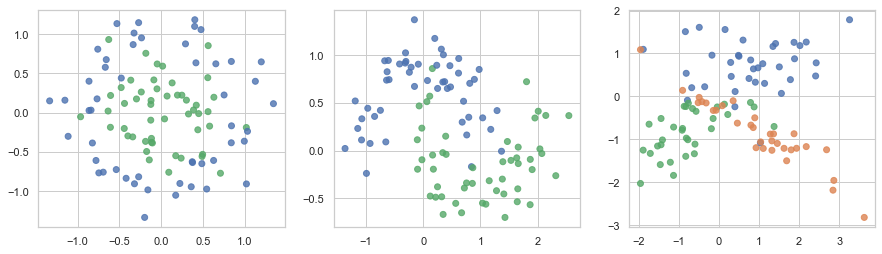

In [42]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [43]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

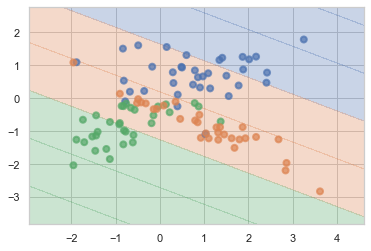

In [44]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Train 1.0
Test 0.75
Train 1.0
Test 0.95
Train 1.0
Test 0.7


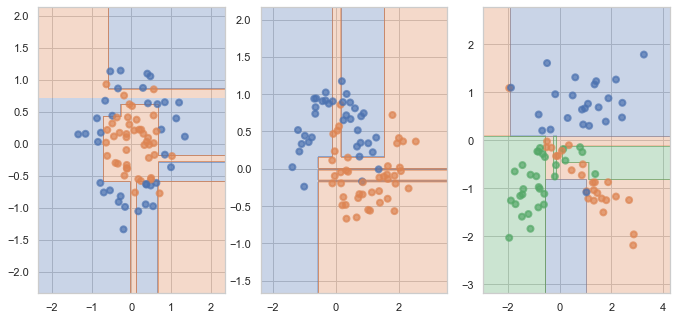

In [45]:
plt.figure(figsize=(10, 5))
for i in range(3):
    x,y=datasets[i]
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
    Tree= DecisionTreeClassifier().fit(x_train, y_train)
    plt.subplot(1, 3, i+1)
    plot_surface(Tree, x_train, y_train)
    print('Train', Tree.score(x_train, y_train))
    print('Test', Tree.score(x_test, y_test))

__Ответ:__

Результаты говорят о переобучении, тк на обучающей выборке точность максимальная, а на тестовой нет. Смотря на графики, мы видим, что разделяющие поверхности сроятся странно. Есть отдельные элементы, которые далеко от своего кластера. Даже для них есть свои поверхности. Скорее всего это объекты-выбросы.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Train 0.8125
Test 0.6
Train 0.9125
Test 1.0
Train 0.9
Test 0.75


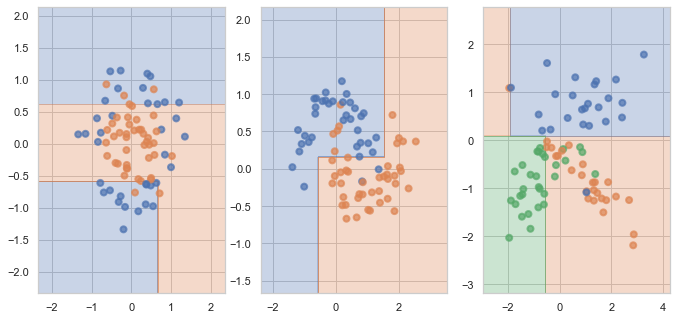

In [46]:
#начинаю с max_depth
plt.figure(figsize=(10, 5))
for i in range(3):
    x,y=datasets[i]
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
    Tree= DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)
    plt.subplot(1, 3, i+1)
    plot_surface(Tree, x_train, y_train)
    print('Train', Tree.score(x_train, y_train))
    print('Test', Tree.score(x_test, y_test))

Train 0.975
Test 0.75
Train 0.9875
Test 0.95
Train 0.9375
Test 0.7


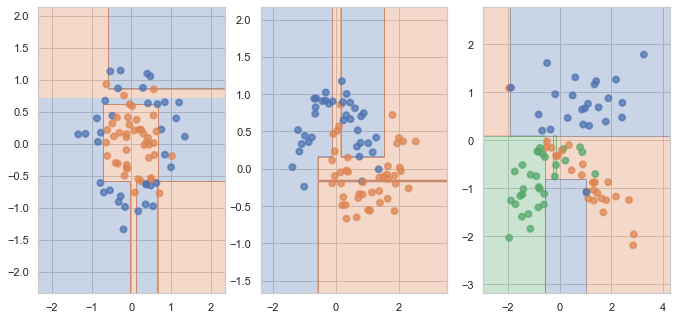

In [47]:
plt.figure(figsize=(10, 5))
for i in range(3):
    x,y=datasets[i]
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
    Tree= DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)
    plt.subplot(1, 3, i+1)
    plot_surface(Tree, x_train, y_train)
    print('Train', Tree.score(x_train, y_train))
    print('Test', Tree.score(x_test, y_test))

Train 0.9125
Test 0.85
Train 0.95
Test 0.8
Train 0.9
Test 0.7


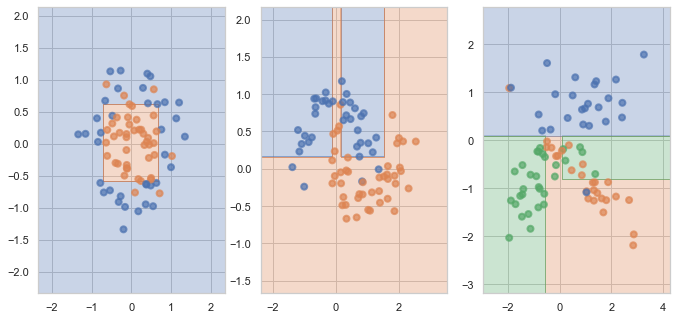

In [48]:
#затем изменим параметр, отвечающий за минимальный размер листа
plt.figure(figsize=(10, 5))
for i in range(3):
    x,y=datasets[i]
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
    Tree= DecisionTreeClassifier(min_samples_leaf=5).fit(x_train, y_train)
    plt.subplot(1, 3, i+1)
    plot_surface(Tree, x_train, y_train)
    print('Train', Tree.score(x_train, y_train))
    print('Test', Tree.score(x_test, y_test))

Train 0.85
Test 0.9
Train 0.875
Test 0.75
Train 0.9
Test 0.7


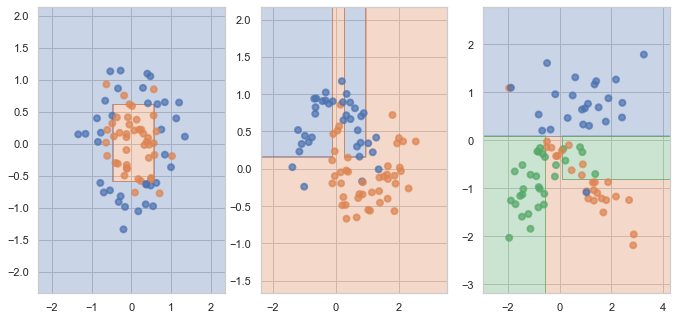

In [49]:
plt.figure(figsize=(10, 5))
for i in range(3):
    x,y=datasets[i]
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
    Tree= DecisionTreeClassifier(min_samples_leaf=8).fit(x_train, y_train)
    plt.subplot(1, 3, i+1)
    plot_surface(Tree, x_train, y_train)
    print('Train', Tree.score(x_train, y_train))
    print('Test', Tree.score(x_test, y_test))

__Ответ:__  Увеличение min_samples_leaf и уменьшение max_depth приводит к снижению сложности модели. Смотря на первый датасет мы видим наиболее точный результат при повышении глубины дерева и уменьшении минимального размера листа. Наш вывод подтверждается. Говоря о второй выборке, мы видим то же самое.  Третий датасет в приципе довольно сложно разделить поверхностями, данные сильно накладываются друг на друга. Думаю, тут будет быстро наступать переобучение 

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [50]:
def find_best_split(feature_vector, target_vector):
    index = np.argsort(feature_vector)
    w, target = feature_vector[index], target_vector[index]
    threshold = ((w[1:] + w[:-1]) / 2) [w[1:] != w[:-1]]
    
    R_L = np.arange(1, np.size(target))
    R_R = np.size(target) - R_L
    cumsums = np.cumsum(target)
    left_sums = cumsums[:-1]
    right_sums = cumsums[-1] - left_sums
    p1_l=left_sums/R_L
    p0_l=1-p1_l
    p1_r=right_sums/R_R
    p0_r=1-p1_r
    
    ginis = (- R_L *(1 - p1_l ** 2 - p0_l ** 2) - R_R * (1 - p1_r ** 2 - p0_r ** 2)) / np.size(target)
    ginis = ginis[w[1:]!=w[:-1]]
    threshold_best = threshold[np.argmax(ginis)]
    ginis_best = ginis[np.argmax(ginis)]
    
    return threshold, ginis, threshold_best, ginis_best



__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
students = pd.read_csv('students.csv')
students=students.drop(columns='Unnamed: 0')
students.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
5,0.09,0.15,0.40,0.10,0.66,1
6,0.10,0.10,0.43,0.29,0.56,1
7,0.15,0.02,0.34,0.40,0.01,0
8,0.20,0.14,0.35,0.72,0.25,0
9,0.00,0.00,0.50,0.20,0.85,1


Text(0.5, 0, 'Порог')

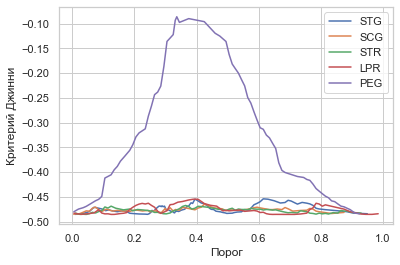

In [52]:
y=students['UNS']
x=students.drop(columns='UNS')
for column in x.columns:
    p, gini, pbest, ginibest  = find_best_split(x[column].values, y.values)
    plt.plot(p, gini, label=column)
plt.legend()
plt.ylabel('Критерий Джинни')
plt.xlabel('Порог')

Text(0.5, 1.0, 'STG')

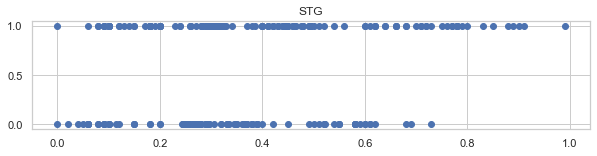

In [53]:
plt.figure(figsize=(10,2))
plt.scatter(x['STG'].values, y.values)
plt.title('STG')

Text(0.5, 1.0, 'SCG')

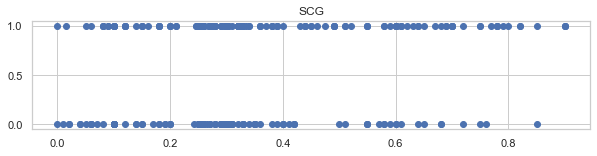

In [54]:
plt.figure(figsize=(10,2))
plt.scatter(x['SCG'].values, y.values)
plt.title('SCG')

Text(0.5, 1.0, 'STR')

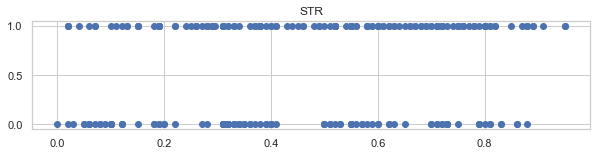

In [55]:
plt.figure(figsize=(10,2))
plt.scatter(x['STR'].values, y.values)
plt.title('STR')

Text(0.5, 1.0, 'LPR')

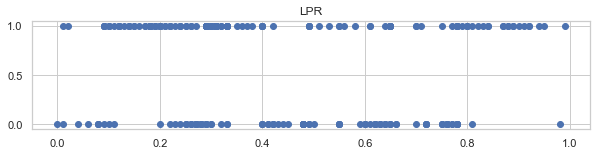

In [56]:
plt.figure(figsize=(10,2))
plt.scatter(x['LPR'].values, y.values)
plt.title('LPR')

Text(0.5, 1.0, 'PEG')

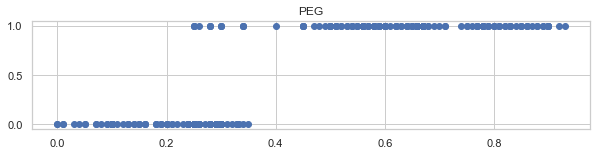

In [57]:
plt.figure(figsize=(10,2))
plt.scatter(x['PEG'].values, y.values)
plt.title('PEG')

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Деление нужно производить по признаку PEG, тк точка, по которой можно разделить выборку на две равные части, в каждой из которых будет содержаться признаки с +- одинаковым значением целевой переменной, совпадает с точкой максимума графика индекса Джинни. Да, согласуется. Вид кривой для хороших признаков имеет хорошо выраженную точку максимума. Для плохих кривых мы ее там едва ли увидим. 

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [58]:
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator

class DecisionTree(BaseEstimator):
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self.tree = {}
        self.feature_types = feature_types
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]):    
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0,sub_X.shape[1]):    
            feature_type = self.feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count 
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1]))) 
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature]))) 
            else:
                raise ValueError

            if len(np.unique(feature_vector)) == 1:   
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":   #Categorical
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]  
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self.feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self.feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])   

    def _predict_node(self, x, node):
        if(node['type'] == 'terminal'):
            return node['class']
        else:
            feature_type = self.feature_types[node['feature_split']]
            if(feature_type == 'real'):
                if(x[node['feature_split']] < node['threshold']):
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])
            else:
                if(x[node['feature_split']] in node['categories_split']):
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])

    def fit(self, X, y):
        self._fit_node(X, y, self.tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self.tree))
        return np.array(predicted)


__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
mushrooms=pd.read_csv('agaricus-lepiota.data',header=None)
mushrooms.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [60]:
for column in mushrooms.columns:
    model=LabelEncoder()
    mushrooms.loc[:,column]=model.fit_transform(mushrooms.loc[:,column])
y=mushrooms[0].values
x=mushrooms.drop(columns=0)
X_train, X_test, Y_train, Y_test = train_test_split(x.values, y, test_size=0.5, random_state=42)
f=['categorical' for x in X_train]
model=DecisionTree(f)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test accuracy', np.sum(y_pred==Y_test)/np.size(Y_test))
y_pred=model.predict(X_train)
print('Train accuracy', np.sum(y_pred==Y_train)/np.size(Y_train))

Test accuracy 1.0
Train accuracy 1.0


__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [61]:
tic_tac_toe=pd.read_csv('tic-tac-toe.data')
cars=pd.read_csv('car.data')
nursery=pd.read_csv('nursery.data')
tic_tac_toe.head(5)

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [62]:
for column in tic_tac_toe.columns:
    model=LabelEncoder()
    tic_tac_toe.loc[:,column]=model.fit_transform(tic_tac_toe.loc[:,column])
ytic_tac_toe=tic_tac_toe['positive'].values
xtic_tac_toe=tic_tac_toe.drop(columns='positive')
#y_tic_tac_toe = np.array(tic_tac_toe['positive'])
#x_tic_tac_toe = np.array(tic_tac_toe.drop('positive', axis=1))
tic_tac_toe.head(5)

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1


In [63]:
cars.head(5)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [64]:
cars.loc[(cars['unacc']=='unacc'), 'unacc']='acc'
cars.loc[(cars['unacc']=='vgood'), 'unacc']='good'
for column in cars.columns:
    model=LabelEncoder()
    cars.loc[:,column]=model.fit_transform(cars.loc[:,column])
ycars=cars['unacc'].values
xcars=cars.drop(columns='unacc')
cars.head(5)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,0
1,3,3,0,0,2,0,0
2,3,3,0,0,1,1,0
3,3,3,0,0,1,2,0
4,3,3,0,0,1,0,0


In [65]:
nursery.head(5)

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [66]:
nursery.loc[(nursery['recommend'] == 'not_recom'), 'recommend'] = 'recommend'
nursery.loc[(nursery['recommend'] == 'very_recom') | (nursery['recommend'] == 'spec_prior'), 'recommend'] = 'priority'
for column in nursery.columns:
    model=LabelEncoder()
    nursery.loc[:,column]=model.fit_transform(nursery.loc[:,column])
ynursery=nursery['recommend'].values
xnursery=nursery.drop(columns='recommend')
nursery.head(5)

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,2,3,0,0,0,0,0,1,0
1,2,3,0,0,0,0,0,0,1
2,2,3,0,0,0,0,2,2,1
3,2,3,0,0,0,0,2,1,0
4,2,3,0,0,0,0,2,0,1


In [67]:
targets=[]
targets.append(y)
targets.append(ytic_tac_toe)
targets.append(ycars)
targets.append(ynursery)
featureses=[]
featureses.append(x)
featureses.append(xtic_tac_toe)
featureses.append(xcars)
featureses.append(xnursery)

def algoritms(x, y):
    results= {}
    results['real'] = [cross_val_score(DecisionTree(['real' for x in x.columns]), x.values, y, cv=10, scoring="accuracy").mean()]
    results['categorical'] = [cross_val_score(DecisionTree(['categorical' for x in x.columns]), x.values, y, cv=10, scoring="accuracy").mean()]
    ohe = OneHotEncoder(sparse=False).fit_transform(x)
    results['real+oh'] = [cross_val_score(DecisionTree(['real'] * ohe.shape[1]), ohe, y, cv=10, scoring="accuracy").mean()]
    results['sklearn'] = [cross_val_score(DecisionTreeClassifier(), x.values, y, cv=10, scoring="accuracy").mean()]
    return results


rows = ['musrooms','tic tac','cars','nursery']
columns_= ['real', 'categorical','real+oh', 'sklearn']
df = pd.DataFrame(columns=columns_) 

In [68]:
for i in range(4):
    results = algoritms(featureses[i], targets[i])
    results['name'] = rows[i]
    df = df.append(results, ignore_index=True)
df.set_index('name')  

,real,categorical,real+oh,sklearn
name,,,,
musrooms,[0.9992610837438424],[1.0],[0.9996305418719211],[0.956689025018329]
tic tac,[0.4626973684210527],[0.549265350877193],[0.5535197368421052],[0.7548684210526315]
cars,[0.9425998118026616],[0.9675191558005108],[0.9217670385804544],[0.9449522785320607]
nursery,[0.9998456790123458],[0.9997685185185186],[0.9997685185185186],[0.9998456790123458]


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Датасет tic tac дает наименьшую точность на всех наборов данных, но лучше всего работает sklearn. Но как видно данные лучше переводить в вещественные признаки с помощью Ohe-кодирования или оставлять их категориальными. Думаю, случайности тут нет, тк random_state я фиксировала. 